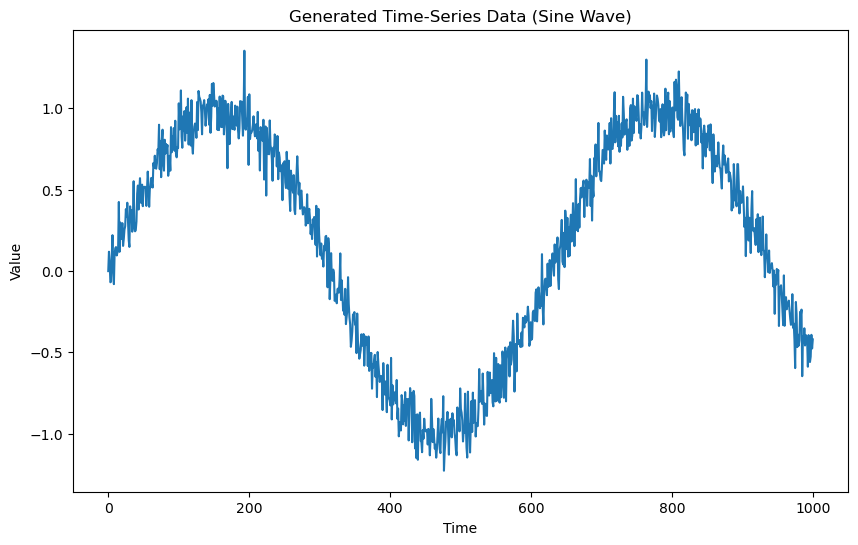

Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2399
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0079
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0044
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0029
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0023
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0022
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0021
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0022
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0021
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0022
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


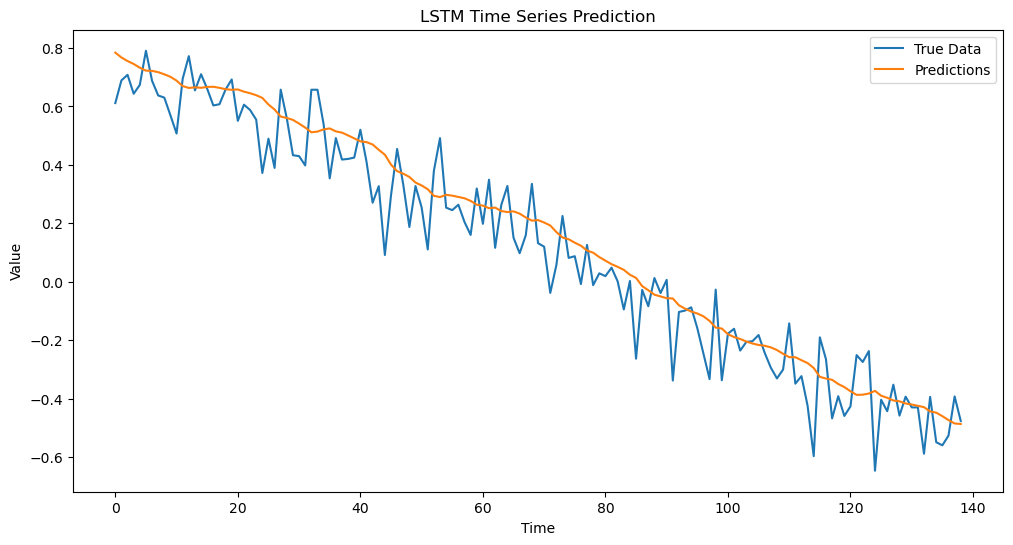

Root Mean Squared Error (RMSE): 0.11044520129425638


In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Generate example time-series data (sine wave)
time_steps = 1000
x = np.linspace(0, time_steps, time_steps)
y = np.sin(x / 100) + np.random.normal(0, 0.1, time_steps)

# Plot the time-series data
plt.figure(figsize=(10,6))
plt.plot(x, y)
plt.title('Generated Time-Series Data (Sine Wave)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Prepare the data: Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

# Create a function to prepare the dataset
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

# Split data into train and test sets
train_size = int(len(y_scaled) * 0.8)
train, test = y_scaled[:train_size], y_scaled[train_size:]

# Prepare the training and testing data
look_back = 60  # Use the past 60 timesteps to predict the next timestep
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

# Reshape input to be 3D for LSTM [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=False, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Predict using the model
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Inverse transform to get the actual predicted values
train_pred = scaler.inverse_transform(train_pred)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
test_pred = scaler.inverse_transform(test_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='True Data')
plt.plot(test_pred, label='Predictions')
plt.title('LSTM Time Series Prediction')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Calculate RMSE for model performance evaluation
from sklearn.metrics import mean_squared_error
import math

rmse = math.sqrt(mean_squared_error(y_test_actual, test_pred))
print(f'Root Mean Squared Error (RMSE): {rmse}')
